In [1]:
#This code helps you to explore data and visualize decision trees but the best model after watching the graphs of dataset it 
#would be logistic regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for graphical representation
from IPython.display import Image, display  # to disaply decision tree
from pylab import rcParams  #importing rcParams for handling default matplotlib values.

# Data exploration using seaborn

In [2]:
#loading data set
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
dataset = pd.read_csv(url)
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#checking the missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we an observe that there are null values in Age and Cabin

<AxesSubplot:>

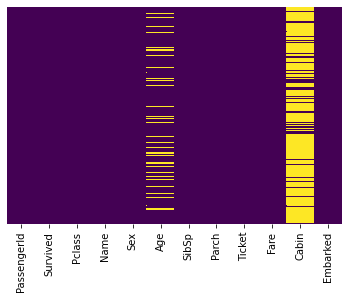

In [5]:
#Representing the above null values using Heat maps
sns.heatmap(dataset.isnull(),yticklabels = False, cbar=False, cmap='viridis')

Once we fix the null values heatmaps looks plane, we can re run the code after fixing it by scrolling up

<AxesSubplot:xlabel='Survived', ylabel='count'>

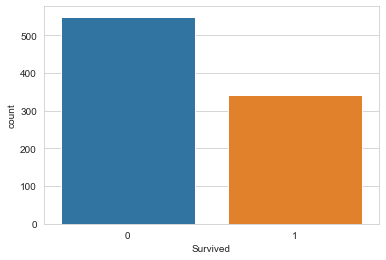

In [6]:
#we can fill missing values using mean, imputer and the other way will come back here later lets analyse other data
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

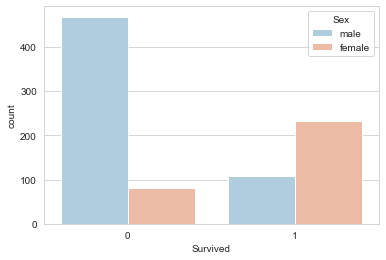

In [7]:
#now to get the information how many survived using gender(sex)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dataset, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

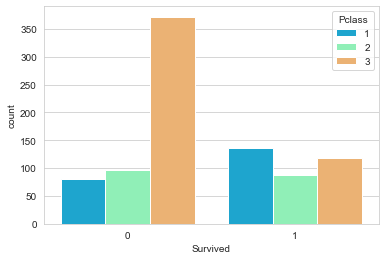

In [8]:
#analysis survival based on Passengerclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = dataset,palette = 'rainbow')

C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

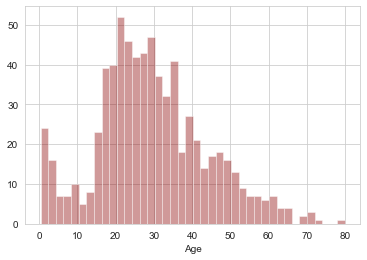

In [9]:
#to the distribution of age, we can do it in 2 ways
sns.distplot(dataset['Age'].dropna(),kde=False, color ='darkred', bins=40)#kde is kernel distribution)

<AxesSubplot:>

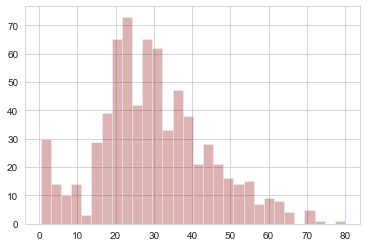

In [10]:
#the other way to do it using matplotlib
dataset['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

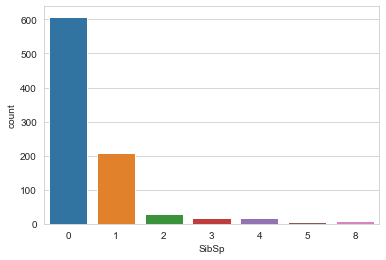

In [11]:
#counting who had sibling or spouse
sns.countplot(x = 'SibSp',data=dataset)

<AxesSubplot:>

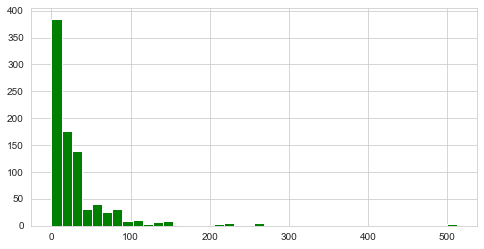

In [12]:
dataset['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

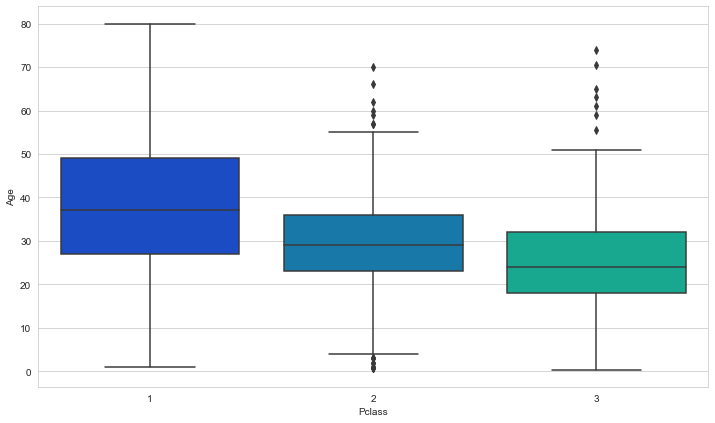

In [13]:
#so going back to missing values filling values with respective to Pclass
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y = 'Age', data= dataset, palette = 'winter')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
#now applying the fucntion
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

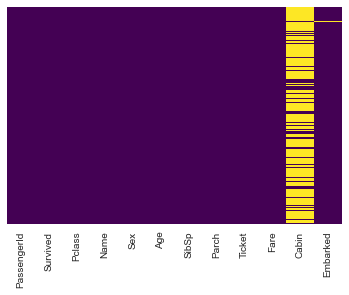

In [16]:
#now check the heat map
sns.heatmap(dataset.isnull(),yticklabels = False, cbar=False, cmap='viridis')

In [17]:
#converting categorical variables
dataset['Embarked']=pd.get_dummies(dataset['Embarked'],drop_first=True).head()

In [18]:
dataset['Sex']=pd.get_dummies(dataset['Sex'],drop_first=True).head()

In [19]:
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0


In [20]:
dataset=dataset.drop(['Name','PassengerId','Name','Ticket','Cabin'],axis=1)
dataset.head(2)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,0.0
1,1,1,0.0,38.0,1,0,71.2833,0.0


In [21]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,0.0
1,1,1,0.0,38.0,1,0,71.2833,0.0


C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


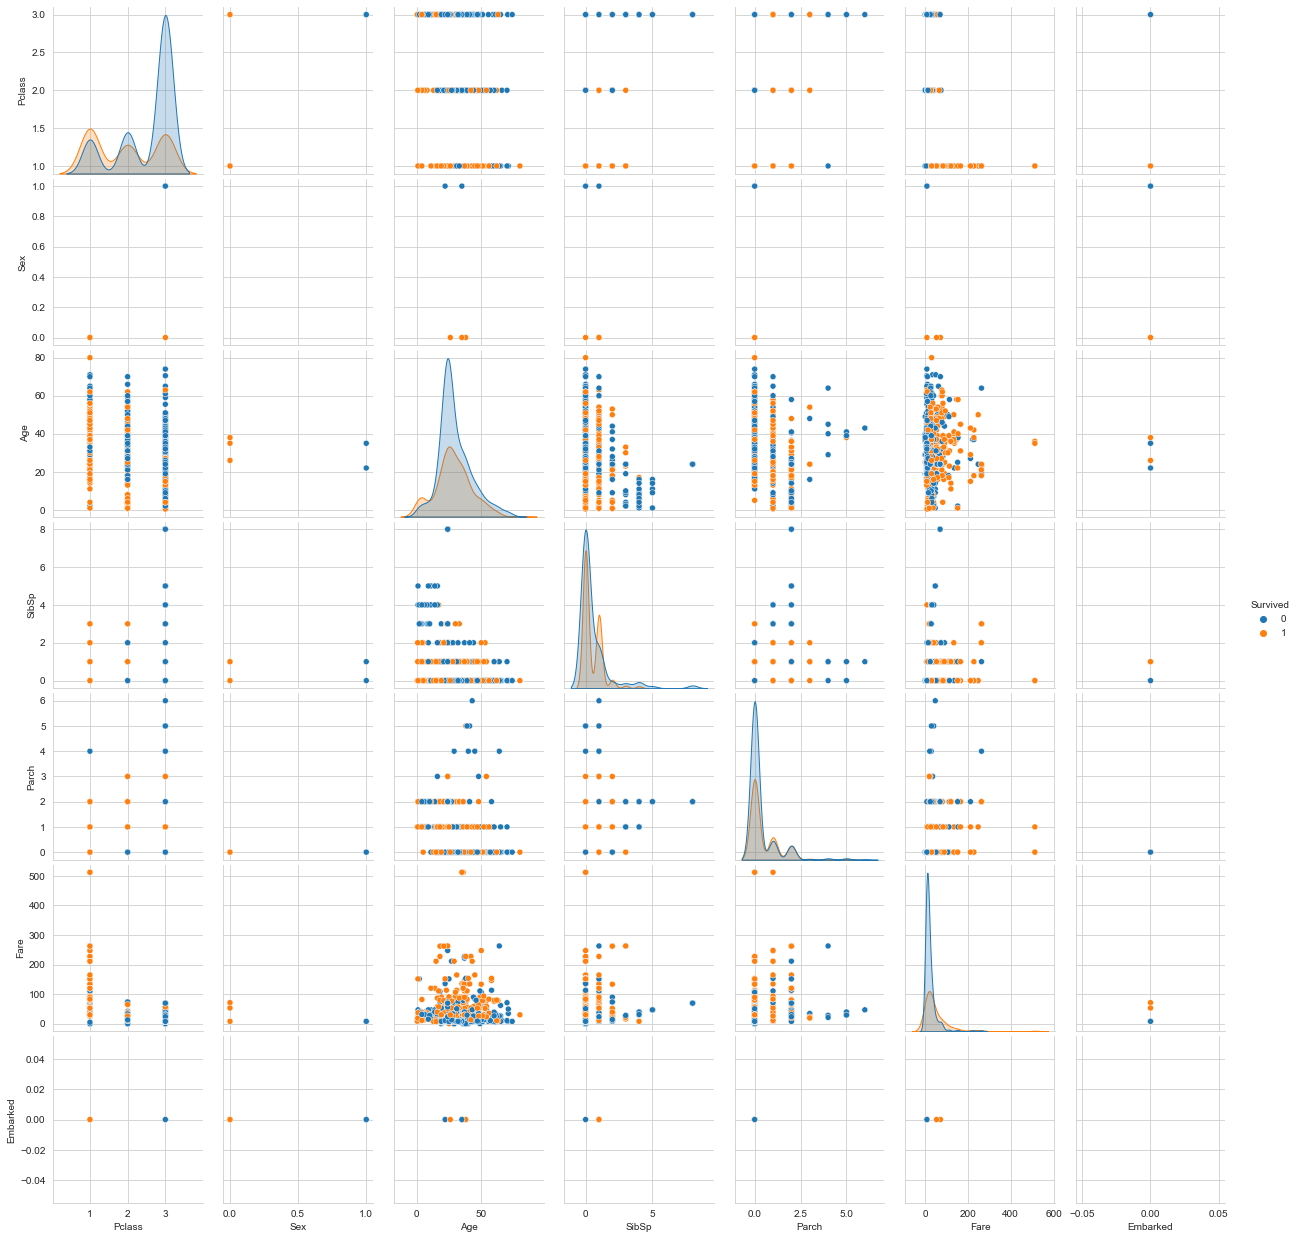

In [22]:
sns.pairplot(dataset,hue='Survived')

In [23]:
X=dataset.drop("Survived",axis=1)
y=dataset['Survived']

In [24]:
X.isnull().sum()

Pclass        0
Sex         886
Age           0
SibSp         0
Parch         0
Fare          0
Embarked    886
dtype: int64

In [26]:
X['Sex']=X['Sex'].fillna(0)
X['Embarked']=X['Embarked'].fillna(0)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,0.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,0.0
3,1,0.0,35.0,1,0,53.1000,0.0
4,3,1.0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0.0,27.0,0,0,13.0000,0.0
887,1,0.0,19.0,0,0,30.0000,0.0
888,3,0.0,24.0,1,2,23.4500,0.0
889,1,0.0,26.0,0,0,30.0000,0.0


In [27]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
for_graph=classifier.fit(X_train,y_train)


[Text(446.4871875, 532.7280000000001, 'X[0] <= 0.253\nentropy = 0.964\nsamples = 623\nvalue = [381, 242]'),
 Text(148.066171875, 510.98400000000004, 'X[5] <= -0.39\nentropy = 0.99\nsamples = 288\nvalue = [127, 161]'),
 Text(61.38, 489.24, 'X[2] <= 1.642\nentropy = 0.908\nsamples = 68\nvalue = [46, 22]'),
 Text(55.8, 467.49600000000004, 'X[5] <= -0.512\nentropy = 0.938\nsamples = 62\nvalue = [40, 22]'),
 Text(50.22, 445.752, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(61.38, 445.752, 'X[2] <= -0.131\nentropy = 0.967\nsamples = 56\nvalue = [34, 22]'),
 Text(27.9, 424.00800000000004, 'X[5] <= -0.445\nentropy = 0.828\nsamples = 23\nvalue = [17, 6]'),
 Text(11.16, 402.264, 'X[2] <= -0.96\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(5.58, 380.52000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(16.740000000000002, 380.52000000000004, 'X[2] <= -0.847\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(11.16, 358.776, 'entropy = 0.0\nsamples = 1\nvalue = [0,

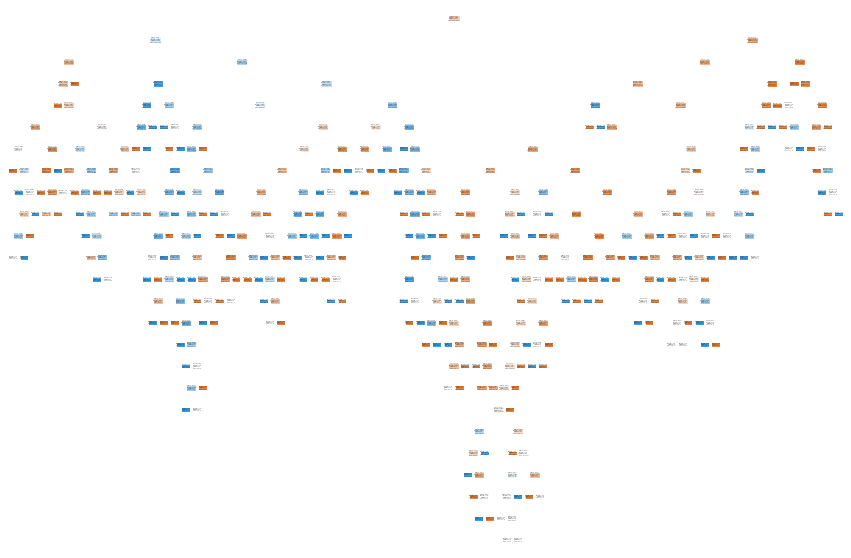

In [35]:

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(for_graph,filled=True)

In [36]:
#since it is not working for huge data use another method but before that lets evaluate the score


#predicting the output and storing in 'prediction' from model
predictions = classifier.predict(X_test)


In [37]:
#importing these packages for predicting accuracy of the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
#fitting predicted values and test output values in confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)

#getting accuracy of the model from accuracy_score
accuracy = accuracy_score(y_test,predictions)

In [39]:
#showing confusion matrix for the model and accuracy of the model
conf_matrix,accuracy

(array([[134,  34],
        [ 47,  53]], dtype=int64),
 0.6977611940298507)

In [40]:
print("Accuracy of the model is : "+ str(accuracy))

Accuracy of the model is : 0.6977611940298507


In [41]:
#printing the classification report of the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       168
           1       0.61      0.53      0.57       100

    accuracy                           0.70       268
   macro avg       0.67      0.66      0.67       268
weighted avg       0.69      0.70      0.69       268



In [47]:
pip install six


SyntaxError: invalid syntax (<ipython-input-47-6045c4a21240>, line 1)

In [48]:
!pip install pydot

In [51]:
#Importing packages to show the decision tree build for the model 
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

#getting columns of dataframe in arranged manner for ease
col_order = ['Survived']+dataset.iloc[:,0:5].columns.values.tolist()+dataset.iloc[:,6:].columns.values.tolist()
col_order

['Survived', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [52]:

#getting all the features which plays role in predicting output feature
features = list(col_order[1:])

#showing features output
features

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [56]:
#initializing instance of StringIO
dot_data = StringIO()

#buliding tree for the model
export_graphviz(classifier,out_file=dot_data,feature_names=features,filled=True,rounded=True)

#creating graph
graph = pydot.graph_from_dot_data(dot_data.getvalue())

#converting into Image for showing 
Image(graph[0].create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.